<a href="https://colab.research.google.com/github/noh-yujeong/SPARTACODING_education_content/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='yujeongnoh'
os.environ['KAGGLE_KEY']='2cc78e97f3ecf39d0addf7f6420db18f'

!kaggle datasets download -d datamunge/sign-language-mnist

 70% 44.0M/62.6M [00:00<00:00, 66.3MB/s]
100% 62.6M/62.6M [00:00<00:00, 107MB/s] 


In [ ]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
#0. 패키지 로딩하기
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#데이터 셋 로딩하기
train_df=pd.read_csv('sign_mnist_train.csv')
train_df.head()

test_df=pd.read_csv('sign_mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


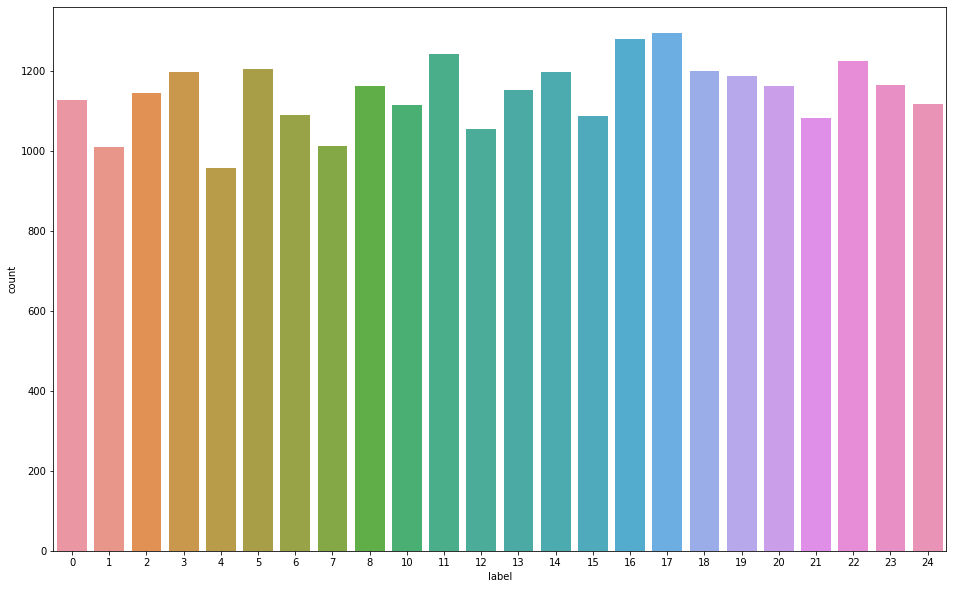

In [ ]:
#label 분포
###9=J 또는 25=Z는 동작이 들어가므로 제외
###총 24개의 label

plt.figure(figsize=(16,10))
sns.countplot(train_df['label'])
plt.show()

In [ ]:
#전처리하기
###입력과 출력 나누기

train_df=train_df.astype(np.float32)
x_train=train_df.drop(columns=['label'],axis=1).values
y_train=train_df[['label']].values

test_df=test_df.astype(np.float32)
x_test=test_df.drop(columns=['label'],axis=1).values
y_test=test_df[['label']].values

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(27455, 784) (27455, 1)
(7172, 784) (7172, 1)


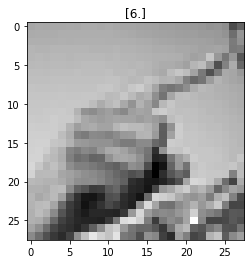

In [ ]:
#데이터 미리보기
index=1

plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [ ]:
#원핫인코딩

encoder=OneHotEncoder()
y_train=encoder.fit_transform(y_train).toarray()
y_test=encoder.fit_transform(y_test).toarray()
print(y_train.shape)

(27455, 24)


In [ ]:
#generalization
"""
이미지 데이터는 픽셀이 0~255사이의 정수(unsigned integer 8bit=uint8)로 되어 있습니다.
이것을 255로 나누어 0-1사이의 소수점 데이터(floating point 32bit=float32)로 바꾸고, 일반화 시키도록 합니다.
"""

x_train=x_train/255.
x_test=x_test/255.



In [ ]:
#network 구성하기

input=Input(shape=(784,))
hidden=Dense(1024,activation='relu')(input)
hidden=Dense(512,activation='relu')(hidden)
hidden=Dense(256,activation='relu')(hidden)
output=Dense(24,activation='softmax')(hidden)

model=Model(inputs=input,outputs=output)

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 24)                6168      
Total params: 1,466,136
Trainable params: 1,466,136
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(
    x_train,y_train,validation_data=(x_test,y_test),epochs=20
)

Epoch 1/20
858/858 [==============================] - 16s 18ms/step - loss: 1.6326 - acc: 0.4669 - val_loss: 1.2058 - val_acc: 0.6083
Epoch 2/20
858/858 [==============================] - 15s 17ms/step - loss: 0.5570 - acc: 0.8051 - val_loss: 0.9273 - val_acc: 0.7356
Epoch 3/20
858/858 [==============================] - 15s 18ms/step - loss: 0.2730 - acc: 0.9044 - val_loss: 1.0128 - val_acc: 0.7331
Epoch 4/20
858/858 [==============================] - 15s 17ms/step - loss: 0.1729 - acc: 0.9438 - val_loss: 1.0495 - val_acc: 0.6960
Epoch 5/20
858/858 [==============================] - 15s 17ms/step - loss: 0.1412 - acc: 0.9539 - val_loss: 1.2979 - val_acc: 0.7009
Epoch 6/20
858/858 [==============================] - 15s 17ms/step - loss: 0.0998 - acc: 0.9670 - val_loss: 1.0796 - val_acc: 0.7846
Epoch 7/20
858/858 [==============================] - 15s 17ms/step - loss: 0.1055 - acc: 0.9656 - val_loss: 0.9179 - val_acc: 0.8141
Epoch 8/20
858/858 [==============================] - 15s 17ms

In [ ]:
#학습 결과 그래프
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])